# Loading Roo data

You should have received a .json file from Michael. Please copy it to this directory and rename it to `credential.json` but _do not_ commit it to source control. Next, set the name of the database table you want to load. Unless we've told you to change it, you can leave this unchanged:

In [2]:
DATA_TABLE = "roo-ds.ai_studio_2024.labeled_conversations"

Now run the following, and you'll get a variable named `df` containing a dataframe of all labeled conversations.

In [3]:
import numpy as np  # Ensure numpy is imported if needed
import pandas as pd
from google.auth.exceptions import DefaultCredentialsError
from google.cloud import bigquery
from google.oauth2 import service_account

try:
    # Load credentials from the service account file
    credentials = service_account.Credentials.from_service_account_file(
        "./credential.json",
        scopes=["https://www.googleapis.com/auth/cloud-platform"],
    )

    # Initialize a BigQuery client
    client = bigquery.Client(credentials=credentials)

    # Execute the query and pip install pandas==1.3.4
    df = client.query(f"SELECT * FROM {DATA_TABLE}").to_dataframe()

    # Display the DataFrame (or perform further analysis)
    print(df)

except DefaultCredentialsError as e:
    print(f"Error loading credentials: {e}")

except Exception as e:
    print(f"An error occurred: {e}")


C:\Users\nguzm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


                   Genesys_interaction_id        Gender  \
0    56663169-94d3-4a0c-a427-2f4752f20f32          None   
1    9d8858a7-0821-4546-b69b-51f03e381830          None   
2    d56a9d48-a45a-4482-9dde-a826ede0c69b          None   
3    bc3f2707-70f2-4f1c-8080-11885cd0b60a          None   
4    74c9a6bb-fc6c-49e9-8a34-8f90af8250ef          None   
..                                    ...           ...   
743  0e12bb57-bd23-4bef-8314-f754a2f2db09          None   
744  93ed5a1f-65f7-472c-b8bf-fd300c7e1633  Girl / Woman   
745  93ed5a1f-65f7-472c-b8bf-fd300c7e1633  Girl / Woman   
746  93ed5a1f-65f7-472c-b8bf-fd300c7e1633  Girl / Woman   
747  93ed5a1f-65f7-472c-b8bf-fd300c7e1633  Girl / Woman   

                         Race Topic   Age  \
0                        None  None  None   
1                        None  None  None   
2                        None  None  None   
3                        None  None  None   
4                        None  None  None   
..                   

# Mergining New Data with Orginal Data

In [4]:
# List of CSV files you want to add
csv_files = ["Menstruation.csv", "RelationshipAndConsent.csv", "Religion_Other.csv", "ReprodHealth.csv", "ReprodLaws.csv","SexMasturbation.csv", "SexualOrientation .csv"]  # Add as many files as you need
cols_to_include =['Prompt ', 'Response ', 'Response Category (FP, FN, TP, TN)']
# Loop through each CSV file, load it, and concatenate it with df
for file in csv_files:
    new_data = pd.read_csv(file, usecols= cols_to_include)  # Load each CSV file
    df = pd.concat([df, new_data], ignore_index=True)  # Concatenate each new DataFrame with the main one


# Save the combined dataset locally (optional)
df.to_csv("combined_data.csv", index=False)

# print the shape of the combined dataset to verify it worked
print(f"Combined data has {df.shape[0]} rows and {df.shape[1]} columns.")


Combined data has 796 rows and 25 columns.


# Exploratory Data Analysis

In [5]:
# Look at first 10 entities of dataset
df.head(5)
df.tail

<bound method NDFrame.tail of                    Genesys_interaction_id Gender  Race Topic   Age  \
0    56663169-94d3-4a0c-a427-2f4752f20f32   None  None  None  None   
1    9d8858a7-0821-4546-b69b-51f03e381830   None  None  None  None   
2    d56a9d48-a45a-4482-9dde-a826ede0c69b   None  None  None  None   
3    bc3f2707-70f2-4f1c-8080-11885cd0b60a   None  None  None  None   
4    74c9a6bb-fc6c-49e9-8a34-8f90af8250ef   None  None  None  None   
..                                    ...    ...   ...   ...   ...   
791                                   NaN    NaN   NaN   NaN   NaN   
792                                   NaN    NaN   NaN   NaN   NaN   
793                                   NaN    NaN   NaN   NaN   NaN   
794                                   NaN    NaN   NaN   NaN   NaN   
795                                   NaN    NaN   NaN   NaN   NaN   

                                     Full_conversation Comfort Quality  \
0    [{'text': 'Hey there, I'm Roo! You can ask me ... 

In [6]:
df.rename(columns={'Response Category (FP, FN, TP, TN)': 'Ratings'}, inplace=True)

# Printing all attributes of data
print("Column names:")
print(df.columns)

Column names:
Index(['Genesys_interaction_id', 'Gender', 'Race', 'Topic', 'Age',
       'Full_conversation', 'Comfort', 'Quality', 'Helpfulness', 'Confidence',
       'First_prompt', 'First_response', 'Interaction_contains_PII',
       'First_label', 'Flag_label_for_review', 'Comment', 'Provided_prompt',
       'Provided_prompt_autocalculated', 'Labeller',
       'Reviewer_suggested_label', 'Reviewer', 'Reviewer_comment', 'Prompt ',
       'Response ', 'Ratings'],
      dtype='object')


In [7]:
# This will give you a summary of the DataFrame including the column names, data types, and non-null values
print("Basic info of the DataFrame:")
df.info()

Basic info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Genesys_interaction_id          748 non-null    object 
 1   Gender                          355 non-null    object 
 2   Race                            355 non-null    object 
 3   Topic                           353 non-null    object 
 4   Age                             355 non-null    object 
 5   Full_conversation               748 non-null    object 
 6   Comfort                         2 non-null      object 
 7   Quality                         3 non-null      object 
 8   Helpfulness                     18 non-null     object 
 9   Confidence                      10 non-null     object 
 10  First_prompt                    748 non-null    object 
 11  First_response                  743 non-null    object 
 12  Interac

In [8]:
print(df.isnull().sum())  # Check for missing values

Genesys_interaction_id             48
Gender                            441
Race                              441
Topic                             443
Age                               441
Full_conversation                  48
Comfort                           794
Quality                           793
Helpfulness                       778
Confidence                        786
First_prompt                       48
First_response                     53
Interaction_contains_PII           48
First_label                       339
Flag_label_for_review              48
Comment                           661
Provided_prompt                    48
Provided_prompt_autocalculated     48
Labeller                          438
Reviewer_suggested_label          704
Reviewer                          701
Reviewer_comment                  780
Prompt                            748
Response                          748
Ratings                           748
dtype: int64


In [9]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

In [10]:
# Merge 'First_prompt' and 'Prompt'
df['Merged_Prompt'] = df[['First_prompt', 'Prompt']].apply(lambda x: ' '.join(x.dropna()), axis=1)

# Merge 'First_response' and 'Response'
df['Merged_Response'] = df[['First_response', 'Response']].apply(lambda x: ' '.join(x.dropna()), axis=1)

df['Rating'] = df[['First_label', 'Ratings']].apply(lambda x: ' '.join(x.dropna()), axis=1)


# Fill NaN values with empty strings
df['Merged_Prompt'] = df['Merged_Prompt'].fillna('')
df['Merged_Response'] = df['Merged_Response'].fillna('')
df['Rating'] = df['Rating'].fillna('')

# Print the updated DataFrame
print(df)


                   Genesys_interaction_id Gender  Race Topic   Age  \
0    56663169-94d3-4a0c-a427-2f4752f20f32   None  None  None  None   
1    9d8858a7-0821-4546-b69b-51f03e381830   None  None  None  None   
2    d56a9d48-a45a-4482-9dde-a826ede0c69b   None  None  None  None   
3    bc3f2707-70f2-4f1c-8080-11885cd0b60a   None  None  None  None   
4    74c9a6bb-fc6c-49e9-8a34-8f90af8250ef   None  None  None  None   
..                                    ...    ...   ...   ...   ...   
791                                   NaN    NaN   NaN   NaN   NaN   
792                                   NaN    NaN   NaN   NaN   NaN   
793                                   NaN    NaN   NaN   NaN   NaN   
794                                   NaN    NaN   NaN   NaN   NaN   
795                                   NaN    NaN   NaN   NaN   NaN   

                                     Full_conversation Comfort Quality  \
0    [{'text': 'Hey there, I'm Roo! You can ask me ...    None    None   
1    [{'tex

In [11]:
df_summ = df.describe(include = 'all')
df_summ

,Genesys_interaction_id,Gender,Race,Topic,Age,Full_conversation,Comfort,Quality,Helpfulness,Confidence,...,Labeller,Reviewer_suggested_label,Reviewer,Reviewer_comment,Prompt,Response,Ratings,Merged_Prompt,Merged_Response,Rating
count,748,355,355,353,355,748,2,3,18,10,...,358,92,95,16,48,48,48,796,796,796
unique,745,6,15,65,23,748,2,3,4,4,...,1,4,2,16,48,48,4,603,273,5
top,93ed5a1f-65f7-472c-b8bf-fd300c7e1633,Girl / Woman,White,Birth Control,17,"[{'text': 'Hey there, I'm Roo! You can ask me ...",2,1,4,1,...,Michelle,FP,Ambreen,This is what you text to get a sex 'Educator' ...,"""How do I insert a tampon?""","""Tampons are like little cotton plugs that go ...",FP,prompt:livechatinstant,Live chat with health educators is currently c...,
freq,4,301,163,87,38,1,1,1,7,3,...,358,50,94,1,1,1,21,27,69,291


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Genesys_interaction_id          748 non-null    object 
 1   Gender                          355 non-null    object 
 2   Race                            355 non-null    object 
 3   Topic                           353 non-null    object 
 4   Age                             355 non-null    object 
 5   Full_conversation               748 non-null    object 
 6   Comfort                         2 non-null      object 
 7   Quality                         3 non-null      object 
 8   Helpfulness                     18 non-null     object 
 9   Confidence                      10 non-null     object 
 10  First_prompt                    748 non-null    object 
 11  First_response                  743 non-null    object 
 12  Interaction_contains_PII        748 

In [13]:
# Drop more columns with mainly null vlaues
df = df.drop(['Comfort', 'Quality', 'Helpfulness', 'Confidence', 'Reviewer_suggested_label', 'Reviewer', 'Reviewer_comment', 'Comment', 'First_prompt', 'Prompt', 'Response', 
              'First_response', 'First_label', 'Flag_label_for_review', 'Provided_prompt', 'Labeller', 'Genesys_interaction_id', 'Interaction_contains_PII', 'Provided_prompt_autocalculated' ], axis=1)
# Print the updated DataFrame
print(df)


    Gender  Race Topic   Age  \
0     None  None  None  None   
1     None  None  None  None   
2     None  None  None  None   
3     None  None  None  None   
4     None  None  None  None   
..     ...   ...   ...   ...   
791    NaN   NaN   NaN   NaN   
792    NaN   NaN   NaN   NaN   
793    NaN   NaN   NaN   NaN   
794    NaN   NaN   NaN   NaN   
795    NaN   NaN   NaN   NaN   

                                     Full_conversation Ratings  \
0    [{'text': 'Hey there, I'm Roo! You can ask me ...     NaN   
1    [{'text': 'Hey there, I'm Roo! You can ask me ...     NaN   
2    [{'text': 'Hey there, I'm Roo! You can ask me ...     NaN   
3    [{'text': 'Hola quiero sacarme una duda', 'use...     NaN   
4    [{'text': 'All health educators are currently ...     NaN   
..                                                 ...     ...   
791                                                NaN      FP   
792                                                NaN      TP   
793                  

In [14]:
# Identify and store rows with missing ratings
missing_ratings = df[df['Rating'].isna()]

# Store the rows with missing ratings in a separate DataFrame
print("Rows with missing ratings:")
print(missing_ratings)

Rows with missing ratings:
Empty DataFrame
Columns: [Gender, Race, Topic, Age, Full_conversation, Ratings, Merged_Prompt, Merged_Response, Rating]
Index: []


In [15]:
import nltk

# Download the necessary nltk datasets
nltk.download('wordnet')       # For lemmatization
nltk.download('omw-1.4')       # Optional, for WordNet multilingual support
nltk.download('stopwords')     # For the stopwords corpus

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nguzm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nguzm\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nguzm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Remove Special Char and Punctuation

In [16]:
import re
# Define a function to remove special characters and punctuation
def remove_special_characters(text):
    # Check if the input is bytes, and decode it
    if isinstance(text, bytes):
        text = text.decode('utf-8')  # Adjust encoding if necessary
    elif not isinstance(text, str):
        text = str(text)  # Convert non-string inputs to string
    # Use regular expressions to substitute special characters with an empty stringa
    # r'[^\w\s]' matches any character that is not a word character or whitespace
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

# Apply the function to the specified columns
# Apply the function and assign results back to the columns
df['Full_conversation'] = df['Full_conversation'].apply(remove_special_characters)
df['Merged_Response'] = df['Merged_Response'].apply(remove_special_characters)
df['Merged_Prompt'] = df['Merged_Prompt'].apply(remove_special_characters)


# View the DataFrame after cleaning
print(df[['Full_conversation', 'Merged_Response', 'Merged_Prompt', 'Ratings']])


                                     Full_conversation  \
0    text Hey there Im Roo You can ask me questions...   
1    text Hey there Im Roo You can ask me questions...   
2    text Hey there Im Roo You can ask me questions...   
3    text Hola quiero sacarme una duda user custome...   
4    text All health educators are currently busy T...   
..                                                 ...   
791                                                nan   
792                                                nan   
793                                                nan   
794                                                nan   
795                                                nan   

                                       Merged_Response  \
0    BTW this chat is completely private and confid...   
1                     Hey hey What can I help you with   
2    BTW this chat is completely private and confid...   
3    All health educators are currently busy The es...   
4            

## Rempove Stopwords

In [17]:
from nltk.corpus import stopwords

# Download stopwords if you haven't already (uncomment the next line)
nltk.download('stopwords')

# Get the default list of English stop words
default_stop_words = set(stopwords.words('english'))
print(default_stop_words)

#Make sure top words incolumns are not removes so we check the columns to detemrine this
print(df.columns)

{'her', 'all', 'him', 'hasn', 'should', 'he', 'them', 'not', 'weren', 'by', 'then', 'y', 'had', 're', 'out', 'if', 'at', 'our', "you'd", 'through', 'mustn', 'she', 'their', 'yours', 'shan', 'how', 'a', 'don', 'which', "doesn't", "mightn't", 'didn', 'against', 'we', 'himself', 'those', 'did', 'of', 'from', 'once', 'be', 'because', 'couldn', 'are', 'themselves', 'have', 'again', 'll', "you'll", 'shouldn', "hadn't", 'during', "shouldn't", 'and', 'above', 'wasn', 'his', 'these', 'but', 'here', 'further', 'does', 'as', 'isn', "should've", 'has', 'whom', 'own', 'most', 'the', "you've", 'for', 'other', 'such', 'd', 'it', 'or', 'until', 'off', 'so', "hasn't", 'haven', "won't", 'where', 'was', 'herself', 'theirs', 'over', 'after', 've', 'too', "weren't", 'before', 'm', "don't", 'can', 'down', 'myself', 'under', 'just', 'same', 'me', 'hadn', 'what', 'itself', 'who', 'no', 'ourselves', 'am', 'that', 'this', "it's", 'more', 'yourselves', "couldn't", "didn't", 'were', 'doing', 'my', 'only', 'i', 'y

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nguzm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Create a custom stop words set, excluding words you don't want to remove
# For example, let's not remove 'not' and 'but'
custom_stop_words = default_stop_words - {'Genesys_interaction_id', 'Gender', 'Race', 'Topic', 'Age',
       'Full_conversation', 'Interaction_contains_PII',
       'Provided_prompt_autocalculated', 'Ratings', 'Merged_Prompt',
       'Merged_Response','he','his','him','she','her','hers','they','their','theirs'}

# Define a function to remove stop words
def remove_stop_words(text):
    # Check if the input is bytes, and decode it
    if isinstance(text, bytes):
        text = text.decode('utf-8')
    # Split the text into words
    words = text.split()
    # Remove stop words from the text
    filtered_words = [word for word in words if word.lower() not in custom_stop_words]
    # Join the filtered words back into a string
    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

# Apply the function to the columns
df['Full_conversation'] = df['Full_conversation'].apply(remove_stop_words)
df['Merged_Response'] = df['Merged_Response'].apply(remove_stop_words)
df['Merged_Prompt'] = df['Merged_Prompt'].apply(remove_stop_words)

# View the DataFrame after removing stopwords
print(df[['Full_conversation', 'Merged_Response', 'Merged_Prompt', 'Ratings']])


                                     Full_conversation  \
0    text Hey Im Roo ask questions likennWhat happe...   
1    text Hey Im Roo ask questions likennWhat happe...   
2    text Hey Im Roo ask questions likennWhat happe...   
3    text Hola quiero sacarme una duda user custome...   
4    text health educators currently busy estimated...   
..                                                 ...   
791                                                nan   
792                                                nan   
793                                                nan   
794                                                nan   
795                                                nan   

                                       Merged_Response  \
0    BTW chat completely private confidential Start...   
1                                         Hey hey help   
2    BTW chat completely private confidential Start...   
3    health educators currently busy estimated wait...   
4            

## Convert Text to All Lowercase

In [19]:
# Define a function to convert text to lowercase
def convert_to_lowercase(text):
    # Check if the input is bytes, and decode it
    if isinstance(text, bytes):
        text = text.decode('utf-8')
    # Convert text to lowercase
    return text.lower()

# Apply the function to the columns
df['Full_conversation'] = df['Full_conversation'].apply(convert_to_lowercase)
df['Merged_Response'] = df['Merged_Response'].apply(convert_to_lowercase)
df['Merged_Prompt'] = df['Merged_Prompt'].apply(convert_to_lowercase)

# View the DataFrame 
print(df[['Full_conversation', 'Merged_Response', 'Merged_Prompt']])


                                     Full_conversation  \
0    text hey im roo ask questions likennwhat happe...   
1    text hey im roo ask questions likennwhat happe...   
2    text hey im roo ask questions likennwhat happe...   
3    text hola quiero sacarme una duda user custome...   
4    text health educators currently busy estimated...   
..                                                 ...   
791                                                nan   
792                                                nan   
793                                                nan   
794                                                nan   
795                                                nan   

                                       Merged_Response  \
0    btw chat completely private confidential start...   
1                                         hey hey help   
2    btw chat completely private confidential start...   
3    health educators currently busy estimated wait...   
4            

## Perform Lemmatization

In [20]:
from nltk.stem import WordNetLemmatizer

# Download WordNet data if you haven't already (uncomment the next line)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to perform lemmatization
def lemmatize_text(text):
    # Check if the input is bytes, and decode it
    if isinstance(text, bytes):
        text = text.decode('utf-8')
    # Split the text into words
    words = text.split()
    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Join the lemmatized words back into a string
    cleaned_text = ' '.join(lemmatized_words)
    return cleaned_text

# Apply the function to the columns
df['Full_conversation'] = df['Full_conversation'].apply(lemmatize_text)
df['Merged_Response'] = df['Merged_Response'].apply(lemmatize_text)
df['Merged_Prompt'] = df['Merged_Prompt'].apply(lemmatize_text)\

print(df[['Full_conversation', 'Merged_Response', 'Merged_Prompt']])



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nguzm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nguzm\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                     Full_conversation  \
0    text hey im roo ask question likennwhat happen...   
1    text hey im roo ask question likennwhat happen...   
2    text hey im roo ask question likennwhat happen...   
3    text hola quiero sacarme una duda user custome...   
4    text health educator currently busy estimated ...   
..                                                 ...   
791                                                nan   
792                                                nan   
793                                                nan   
794                                                nan   
795                                                nan   

                                       Merged_Response  \
0    btw chat completely private confidential start...   
1                                         hey hey help   
2    btw chat completely private confidential start...   
3    health educator currently busy estimated wait ...   
4            

## LSTM

Epoch 1/10 | Train Loss: 1.2788 | Train Acc: 47.79%
Epoch 2/10 | Train Loss: 1.0480 | Train Acc: 48.41%
Epoch 3/10 | Train Loss: 1.0288 | Train Acc: 46.97%
Epoch 4/10 | Train Loss: 1.0336 | Train Acc: 44.86%
Epoch 5/10 | Train Loss: 1.0236 | Train Acc: 48.37%
Epoch 6/10 | Train Loss: 1.0164 | Train Acc: 47.79%
Epoch 7/10 | Train Loss: 1.0286 | Train Acc: 43.37%
Epoch 8/10 | Train Loss: 1.0199 | Train Acc: 47.98%
Epoch 9/10 | Train Loss: 1.0277 | Train Acc: 44.09%
Epoch 10/10 | Train Loss: 1.0061 | Train Acc: 47.50%
LSTM Confusion Matrix:
[[ 0  3  0  0]
 [ 0 50  0  0]
 [ 0 41  0  0]
 [ 0  7  0  0]]

LSTM Classification Report:
              precision    recall  f1-score   support

          TN       0.00      0.00      0.00         3
          TP       0.50      1.00      0.66        50
          FP       0.00      0.00      0.00        41
          FN       0.00      0.00      0.00         7

    accuracy                           0.50       101
   macro avg       0.12      0.25      0

C:\Users\nguzm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nguzm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nguzm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

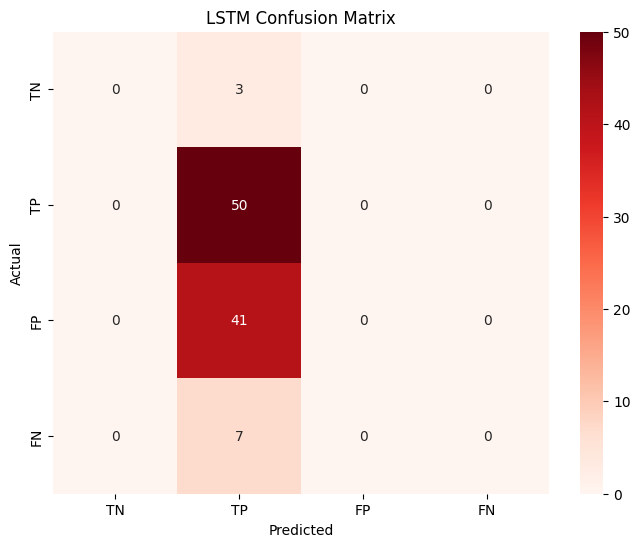

In [21]:
# ====================== Import Necessary Libraries ======================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from collections import Counter

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# ====================== Data Preprocessing ======================

# Load spaCy's English model
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    from spacy.cli import download
    download('en_core_web_sm')
    nlp = spacy.load('en_core_web_sm')

df = pd.DataFrame(df)

# Map 'Rating' to Numerical Classes
label_mapping = {'TN': 0, 'TP': 1, 'FP': 2, 'FN': 3}
df['Numeric_Label'] = df['Rating'].map(label_mapping)
df = df.dropna(subset=['Numeric_Label'])
df['Numeric_Label'] = df['Numeric_Label'].astype(int)

# Handle Missing Values in Text Columns
df['Merged_Prompt'] = df['Merged_Prompt'].fillna('')
df['Merged_Response'] = df['Merged_Response'].fillna('')

# Combine 'First_prompt' and 'First_response'
df['Combined_Text'] = df['Merged_Prompt'] + ' ' + df['Merged_Response']

# Tokenize the text data
def tokenize(text):
    return [token.text.lower() for token in nlp(text)]

df['tokens'] = df['Combined_Text'].apply(tokenize)

# Build Vocabulary
all_tokens = [token for tokens in df['tokens'] for token in tokens]
token_freq = Counter(all_tokens)

# Define vocabulary size (e.g., top 5000 words)
vocab_size = 5000
most_common = token_freq.most_common(vocab_size - 2)  # Reserve spots for PAD and OOV

# Create word to index mapping
word2idx = {word: idx + 2 for idx, (word, _) in enumerate(most_common)}
word2idx['<PAD>'] = 0
word2idx['<OOV>'] = 1

# Create index to word mapping (optional, useful for interpretation)
idx2word = {idx: word for word, idx in word2idx.items()}

# Convert tokens to sequences of indices
def tokens_to_sequence(tokens, word2idx):
    return [word2idx.get(token, word2idx['<OOV>']) for token in tokens]

df['sequences'] = df['tokens'].apply(lambda x: tokens_to_sequence(x, word2idx))

# Pad Sequences
max_length = 100  # Adjust based on your data

def pad_sequence(seq, max_length):
    if len(seq) < max_length:
        return seq + [word2idx['<PAD>']] * (max_length - len(seq))
    else:
        return seq[:max_length]

df['padded_sequences'] = df['sequences'].apply(lambda x: pad_sequence(x, max_length))

# ====================== Create PyTorch Dataset ======================

class ChatbotDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels
    
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        sequence = torch.tensor(self.sequences[idx], dtype=torch.long)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return sequence, label

# Extract features and labels
X = df['padded_sequences'].tolist()
y = df['Numeric_Label'].tolist()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Create dataset instances
train_dataset = ChatbotDataset(X_train, y_train)
test_dataset = ChatbotDataset(X_test, y_test)

# Define batch size
batch_size = 32

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ====================== Define the LSTM Model ======================

class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout, pad_idx):
        super(LSTMClassifier, self).__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=n_layers,
                            batch_first=True,
                            dropout=dropout if n_layers > 1 else 0)
        
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        # x: [batch_size, seq_length]
        embedded = self.embedding(x)  # [batch_size, seq_length, embedding_dim]
        
        lstm_out, (hidden, cell) = self.lstm(embedded)
        # hidden: [n_layers, batch_size, hidden_dim]
        
        # Use the last hidden state
        hidden = self.dropout(hidden[-1,:,:])  # [batch_size, hidden_dim]
        
        out = self.fc(hidden)  # [batch_size, output_dim]
        
        return out

# Define model parameters
embedding_dim = 128
hidden_dim = 128
output_dim = 4  # Number of classes
n_layers = 2
dropout = 0.5
pad_idx = word2idx['<PAD>']

# Instantiate the model
model = LSTMClassifier(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout, pad_idx)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# ====================== Define Loss Function and Optimizer ======================

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move loss function to device
criterion = criterion.to(device)

# ====================== Training the Model ======================

# Define number of epochs
epochs = 10

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    epoch_acc = 0
    
    for sequences, labels in train_loader:
        sequences = sequences.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        predictions = model(sequences)
        
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        
        # Calculate accuracy
        _, preds = torch.max(predictions, 1)
        correct = (preds == labels).float()
        acc = correct.sum() / len(correct)
        epoch_acc += acc.item()
    
    avg_loss = epoch_loss / len(train_loader)
    avg_acc = epoch_acc / len(train_loader)
    
    print(f'Epoch {epoch+1}/{epochs} | Train Loss: {avg_loss:.4f} | Train Acc: {avg_acc*100:.2f}%')

# ====================== Evaluating the Model ======================

# Switch to evaluation mode
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences = sequences.to(device)
        labels = labels.to(device)
        
        predictions = model(sequences)
        _, preds = torch.max(predictions, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm_lstm = confusion_matrix(all_labels, all_preds)
print("LSTM Confusion Matrix:")
print(cm_lstm)

# Classification report
report_lstm = classification_report(all_labels, all_preds, target_names=['TN', 'TP', 'FP', 'FN'])
print("\nLSTM Classification Report:")
print(report_lstm)

# ====================== Visualize the Confusion Matrix ======================

plt.figure(figsize=(8,6))
sns.heatmap(cm_lstm, annot=True, fmt='d', 
            xticklabels=['TN', 'TP', 'FP', 'FN'], 
            yticklabels=['TN', 'TP', 'FP', 'FN'], 
            cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LSTM Confusion Matrix')
plt.show()


## Supprt Vector Machine

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC


df = pd.DataFrame(df)
# Define a dictionary to map categorical labels to numerical values
label_mapping = {'TN': 0, 'TP': 1, 'FP': 2, 'FN': 3}

# Apply the mapping to create a new numerical label column
df['Numeric_Label'] = df['Rating'].map(label_mapping)

# Drop rows with NaN values after mapping (if any)
df = df.dropna(subset=['Numeric_Label'])

# Ensure 'Numeric_Label' is of integer type
df['Numeric_Label'] = df['Numeric_Label'].astype(int)

# Replace NaN values with empty strings in text columns
df['Merged_Prompt'] = df['Merged_Prompt'].fillna('')
df['Merged_Response'] = df['Merged_Response'].fillna('')

# Combine 'First_prompt' and 'First_response' into a single text field
df['Combined_Text'] = df['Merged_Prompt'] + ' ' + df['Merged_Response']


# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    max_features=5000,       # Limit to top 5000 features
    ngram_range=(1, 2),      # Use unigrams and bigrams
    stop_words='english'     # Remove English stopwords
)

# Fit and transform the combined text data
X = vectorizer.fit_transform(df['Combined_Text'])

# Define Labels
y = df['Numeric_Label'].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,           # 20% for testing
    random_state=42,         # For reproducibility
    stratify=y               # Maintain class distribution
)
# Initialize the Support Vector Classifier
svm_model = SVC(
    kernel='linear',         # Linear kernel
    class_weight='balanced', # Handle class imbalance
    probability=True,        # Enable probability estimates
    random_state=42
)

# Train the SVM model
svm_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Compute the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)

# Generate and print the classification report
report_svm = classification_report(y_test, y_pred_svm, target_names=['TN', 'TP', 'FP', 'FN'])
print("\nSVM Classification Report:")
print(report_svm)


SVM Confusion Matrix:
[[ 2  1  0  0]
 [ 2 28 19  1]
 [ 0  5 36  0]
 [ 6  0  1  0]]

SVM Classification Report:
              precision    recall  f1-score   support

          TN       0.20      0.67      0.31         3
          TP       0.82      0.56      0.67        50
          FP       0.64      0.88      0.74        41
          FN       0.00      0.00      0.00         7

    accuracy                           0.65       101
   macro avg       0.42      0.53      0.43       101
weighted avg       0.67      0.65      0.64       101



## Logisitc Regression

In [23]:
df_ratings = pd.DataFrame(df)
df

,Gender,Race,Topic,Age,Full_conversation,Ratings,Merged_Prompt,Merged_Response,Rating,Numeric_Label,Combined_Text,tokens,sequences,padded_sequences
151,None,None,None,None,text hey im roo ask question likennwhat happen...,NaN,hi,sometimes bot hard time understanding human co...,FN,3,hi sometimes bot hard time understanding human...,"[hi, sometimes, bot, hard, time, understanding...","[76, 39, 81, 56, 10, 84, 53, 46, 28, 27, 30, 3...","[76, 39, 81, 56, 10, 84, 53, 46, 28, 27, 30, 3..."
152,None,None,None,None,text hey im roo ask question likennwhat happen...,NaN,hi,sometimes bot hard time understanding human co...,FN,3,hi sometimes bot hard time understanding human...,"[hi, sometimes, bot, hard, time, understanding...","[76, 39, 81, 56, 10, 84, 53, 46, 28, 27, 30, 3...","[76, 39, 81, 56, 10, 84, 53, 46, 28, 27, 30, 3..."
153,None,None,None,None,text hey im roo ask question likennwhat happen...,NaN,hi,sometimes bot hard time understanding human co...,FN,3,hi sometimes bot hard time understanding human...,"[hi, sometimes, bot, hard, time, understanding...","[76, 39, 81, 56, 10, 84, 53, 46, 28, 27, 30, 3...","[76, 39, 81, 56, 10, 84, 53, 46, 28, 27, 30, 3..."
154,None,None,None,None,text hey im roo ask question likennwhat happen...,NaN,hi,sometimes bot hard time understanding human co...,FN,3,hi sometimes bot hard time understanding human...,"[hi, sometimes, bot, hard, time, understanding...","[76, 39, 81, 56, 10, 84, 53, 46, 28, 27, 30, 3...","[76, 39, 81, 56, 10, 84, 53, 46, 28, 27, 30, 3..."
155,None,None,None,None,text hey im roo ask question likennwhat happen...,NaN,cant login,sometimes bot hard time understanding human co...,FN,3,cant login sometimes bot hard time understandi...,"[ca, nt, login, sometimes, bot, hard, time, un...","[156, 13, 935, 39, 81, 56, 10, 84, 53, 46, 28,...","[156, 13, 935, 39, 81, 56, 10, 84, 53, 46, 28,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,NaN,NaN,NaN,NaN,nan,FP,difference homosexual heterosexual,nonbinary mean someone gender identity express...,FP,2,difference homosexual heterosexual nonbinary m...,"[difference, homosexual, heterosexual, nonbina...","[732, 1595, 1596, 934, 101, 116, 307, 579, 159...","[732, 1595, 1596, 934, 101, 116, 307, 579, 159..."
792,NaN,NaN,NaN,NaN,nan,TP,tell im bisexual,way know feel bisexual mean feeling attracted ...,TP,1,tell im bisexual way know feel bisexual mean f...,"[tell, i, m, bisexual, way, know, feel, bisexu...","[155, 14, 48, 715, 30, 55, 113, 715, 101, 229,...","[155, 14, 48, 715, 30, 55, 113, 715, 101, 229,..."
793,NaN,NaN,NaN,NaN,nan,FP,talk family sexual orientation,smart talk parent sex even feel awkward start ...,FP,2,talk family sexual orientation smart talk pare...,"[talk, family, sexual, orientation, smart, tal...","[49, 700, 259, 578, 931, 49, 100, 4, 134, 113,...","[49, 700, 259, 578, 931, 49, 100, 4, 134, 113,..."
794,NaN,NaN,NaN,NaN,nan,FP,watching gay porn mean youre gay,fantasize masturbate doesnt necessarily anythi...,FP,2,watching gay porn mean youre gay fantasize mas...,"[watching, gay, porn, mean, you, re, gay, fant...","[1606, 577, 214, 101, 9, 12, 577, 1607, 528, 1...","[1606, 577, 214, 101, 9, 12, 577, 1607, 528, 1..."


C:\Users\nguzm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Confusion Matrix:
[[ 0  1  0  2]
 [ 1 32 17  0]
 [ 0  6 35  0]
 [ 0  1  0  6]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          TN       0.00      0.00      0.00         3
          TP       0.80      0.64      0.71        50
          FP       0.67      0.85      0.75        41
          FN       0.75      0.86      0.80         7

    accuracy                           0.72       101
   macro avg       0.56      0.59      0.57       101
weighted avg       0.72      0.72      0.71       101



C:\Users\nguzm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


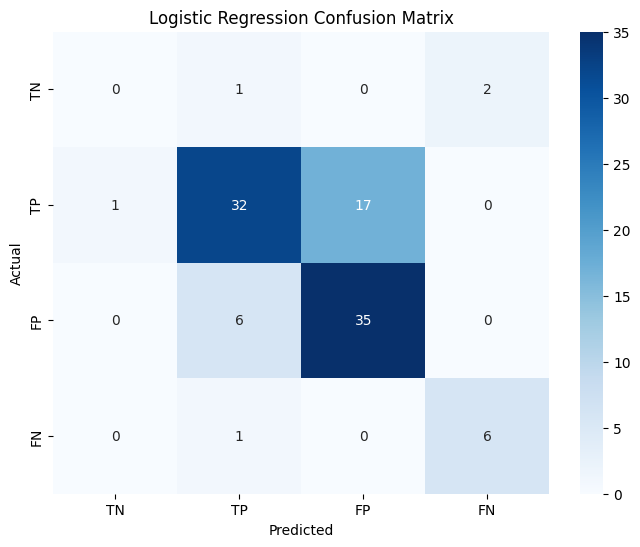

In [24]:
# Logistic Regression Implementation for Multi-Class Classification

# Step 1: Import Necessary Libraries
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # To convert text data into numerical features using TF-IDF
from sklearn.linear_model import LogisticRegression  # For Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix  # For evaluating the model's performance
from scipy.sparse import hstack  # To horizontally stack sparse matrices
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs

# Step 2: Prepare Your Data
# Replace 'df' with your actual DataFrame variable
# Example: If your data is in a CSV file, uncomment and modify the following line:
# df = pd.read_csv('your_data.csv')

# Convert existing data to DataFrame
df_ratings = pd.DataFrame(df)  # Ensures that 'df' is a Pandas DataFrame

# Step 2a: Map 'Rating' to numerical classes
label_mapping = {'TN': 0, 'TP': 1, 'FP': 2, 'FN': 3}  # Define a dictionary to map categorical labels to numerical values
df_ratings['Numeric_Label'] = df_ratings['Rating'].map(label_mapping)  # Apply the mapping to create a new numerical label column

# Step 2b: Inverse mapping for reporting and visualization
inverse_label_mapping = {0: 'TN', 1: 'TP', 2: 'FP', 3: 'FN'}  # Create a reverse mapping to convert numerical labels back to original categories if needed

# Step 2c: Drop rows with NaN values after mapping (if any)
df_ratings = df_ratings.dropna(subset=['Numeric_Label'])  # Remove any rows where 'Numeric_Label' is NaN, which could occur if 'Rating' had unexpected values

# Step 2d: Handle NaN values in text columns
df_ratings['Merged_Prompt'] = df_ratings['Merged_Prompt'].fillna('')  # Replace NaN in 'First_prompt' with empty string
df_ratings['Merged_Response'] = df_ratings['Merged_Response'].fillna('')  # Replace NaN in 'First_response' with empty string

# Step 3: Initialize TF-IDF Vectorizers for Prompts and Responses
vectorizer_prompt = TfidfVectorizer(
    max_features=5000,    # Limit to top 5000 features to reduce dimensionality
    ngram_range=(1, 2),   # Use unigrams and bigrams to capture more context
    stop_words='english'  # Remove common English stopwords
)

vectorizer_response = TfidfVectorizer(
    max_features=5000,    # Consistent feature limit
    ngram_range=(1, 2),   # Consistent n-gram range
    stop_words='english'  # Consistent stopword removal
)

# Step 4: Fit and Transform the Text Data
X_prompt = vectorizer_prompt.fit_transform(df_ratings['Merged_Prompt'])  # Fit the vectorizer on 'First_prompt' and transform the text data into TF-IDF features
X_response = vectorizer_response.fit_transform(df_ratings['Merged_Response'])  # Similarly, fit and transform 'First_response'

# Step 5: Concatenate Prompt and Response Features
X = hstack([X_prompt, X_response])  # Combine the TF-IDF features from prompts and responses into a single feature matrix

# Step 6: Define Labels
y = df_ratings['Numeric_Label'].astype(int)  # Extract the numerical labels as the target variable and ensure they are integers

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,          # Allocate 20% of the data for testing
    random_state=42,        # Set a random seed for reproducibility
    stratify=y              # Maintain the same class distribution in both training and testing sets
)

# Step 8: Initialize and Train Logistic Regression Model
logistic_model = LogisticRegression(
    max_iter=1000,                 # Increase iterations to ensure convergence
    random_state=42,               # For reproducibility
    multi_class='multinomial',     # For multi-class classification
    solver='saga',                 # Suitable solver for multinomial loss
    class_weight='balanced'        # Handle class imbalance
)
logistic_model.fit(X_train, y_train)  # Train the Logistic Regression classifier on the training data

# Step 9: Make Predictions with Logistic Regression
y_pred_lr = logistic_model.predict(X_test)  # Predict the classes for the test set

# Step 10: Evaluate Logistic Regression Model
cm_lr = confusion_matrix(y_test, y_pred_lr)  # Compute the confusion matrix to evaluate prediction accuracy
print("Logistic Regression Confusion Matrix:")
print(cm_lr)  # Display the confusion matrix

report_lr = classification_report(y_test, y_pred_lr, target_names=['TN', 'TP', 'FP', 'FN'])  # Generate a classification report with precision, recall, f1-score
print("\nLogistic Regression Classification Report:")
print(report_lr)  # Display the classification report

# Step 11: Visualize Logistic Regression Confusion Matrix
plt.figure(figsize=(8,6))  # Set the figure size for better readability
sns.heatmap(cm_lr, annot=True, fmt='d', 
            xticklabels=['TN', 'TP', 'FP', 'FN'], 
            yticklabels=['TN', 'TP', 'FP', 'FN'], 
            cmap='Blues')  # Create a heatmap with annotations for the confusion matrix
plt.xlabel('Predicted')  # Label for the x-axis
plt.ylabel('Actual')     # Label for the y-axis
plt.title('Logistic Regression Confusion Matrix')  # Title of the plot
plt.show()  # Display the plot


## Random Forest

Random Forest Confusion Matrix:
[[ 0  0  1  2]
 [ 0 29 21  0]
 [ 0  9 32  0]
 [ 1  1  0  5]]

Random Forest Classification Report:
              precision    recall  f1-score   support

          TN       0.00      0.00      0.00         3
          TP       0.74      0.58      0.65        50
          FP       0.59      0.78      0.67        41
          FN       0.71      0.71      0.71         7

    accuracy                           0.65       101
   macro avg       0.51      0.52      0.51       101
weighted avg       0.66      0.65      0.65       101



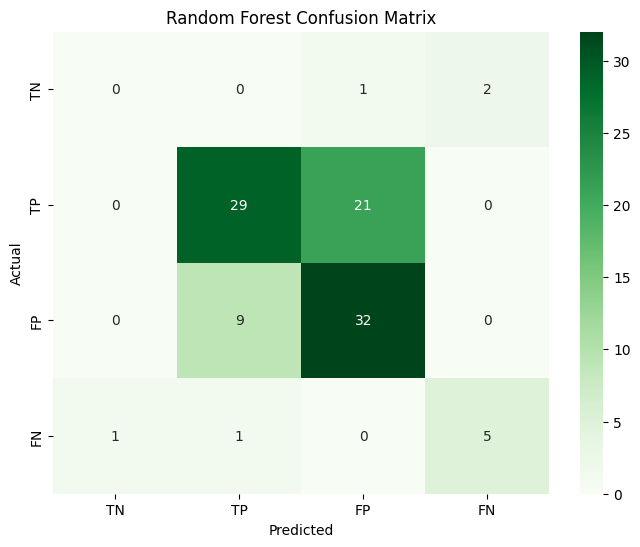

In [31]:
# Random Forest Implementation for Multi-Class Classification with Hyperparameter Tuning

# Step 1: Import Necessary Libraries
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.feature_extraction.text import TfidfVectorizer  # To convert text data into numerical features using TF-IDF
from sklearn.ensemble import RandomForestClassifier  # The Random Forest classifier
from sklearn.metrics import classification_report, confusion_matrix  # For evaluating the model's performance
from scipy.sparse import hstack  # To horizontally stack sparse matrices
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs

# Step 2: Prepare Your Data
# Replace 'df' with your actual DataFrame variable
# Example: If your data is in a CSV file, uncomment and modify the following line:
# df = pd.read_csv('your_data.csv')

# Convert existing data to DataFrame
df_ratings = pd.DataFrame(df)  # Ensures that 'df' is a Pandas DataFrame

# Step 2a: Map 'Rating' to numerical classes
label_mapping = {'TN': 0, 'TP': 1, 'FP': 2, 'FN': 3}  # Define a dictionary to map categorical labels to numerical values
df_ratings['Numeric_Label'] = df_ratings['Rating'].map(label_mapping)  # Apply the mapping to create a new numerical label column

# Step 2b: Inverse mapping for reporting and visualization
inverse_label_mapping = {0: 'TN', 1: 'TP', 2: 'FP', 3: 'FN'}  # Create a reverse mapping to convert numerical labels back to original categories if needed

# Step 2c: Drop rows with NaN values after mapping (if any)
df_ratings = df_ratings.dropna(subset=['Numeric_Label'])  # Remove any rows where 'Numeric_Label' is NaN, which could occur if 'Rating' had unexpected values

# Step 2d: Handle NaN values in text columns
df_ratings['Merged_Prompt'] = df_ratings['Merged_Prompt'].fillna('')  # Replace NaN in 'First_prompt' with empty string
df_ratings['Merged_Response'] = df_ratings['Merged_Response'].fillna('')  # Replace NaN in 'First_response' with empty string


vectorizer_response = TfidfVectorizer(
    max_features=5000,    # Consistent feature limit
    ngram_range=(1, 2),   # Consistent n-gram range
    stop_words='english'  # Consistent stopword removal
)

# Step 4: Fit and Transform the Text Data
X_prompt = vectorizer_prompt.fit_transform(df_ratings['Merged_Prompt'])  # Fit the vectorizer on 'First_prompt' and transform the text data into TF-IDF features
X_response = vectorizer_response.fit_transform(df_ratings['Merged_Response'])  # Similarly, fit and transform 'First_response'

# Step 5: Concatenate Prompt and Response Features
X = hstack([X_prompt, X_response])  # Combine the TF-IDF features from prompts and responses into a single feature matrix

# Step 6: Define Labels
y = df_ratings['Numeric_Label'].astype(int)  # Extract the numerical labels as the target variable and ensure they are integers

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,          # 20% of the data for testing
    random_state=42,        
    stratify=y             
)

# Initialize and Train Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=300,              # Number of trees in the forest
    random_state=42,               # For reproducibility
    class_weight='balanced',       # Handle class imbalance by adjusting weights inversely proportional to class frequencies
    n_jobs=-1                       # Utilize all available cores for parallel processing
)
rf_model.fit(X_train, y_train)  # Train the Random Forest classifier on the training data

# Make Predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)  # Predict the classes for the test set

# Evaluate Random Forest Model
cm_rf = confusion_matrix(y_test, y_pred_rf)  # Compute the confusion matrix to evaluate prediction accuracy
print("Random Forest Confusion Matrix:")
print(cm_rf)  

report_rf = classification_report(y_test, y_pred_rf, target_names=['TN', 'TP', 'FP', 'FN'])  # Generate a classification report with precision, recall, f1-score
print("\nRandom Forest Classification Report:")
print(report_rf)  # Display the classification report

# Step 11: Visualize Random Forest Confusion Matrix
plt.figure(figsize=(8,6))  # Set the figure size for better readability
sns.heatmap(cm_rf, annot=True, fmt='d', 
            xticklabels=['TN', 'TP', 'FP', 'FN'], 
            yticklabels=['TN', 'TP', 'FP', 'FN'], 
            cmap='Greens')  # Create a heatmap with annotations for the confusion matrix
plt.xlabel('Predicted')  # Label for the x-axis
plt.ylabel('Actual')     # Label for the y-axis
plt.title('Random Forest Confusion Matrix')  # Title of the plot
plt.show()  # Display the plot



